In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import PlaintextCorpusReader
from bs4 import BeautifulSoup
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3

In [2]:
corpus_root = "/Users/jianny/AI_practice/document_cluster/sentence_tokenized"
GNICorpus = PlaintextCorpusReader(corpus_root, '.*\.txt', encoding='utf-8')

In [3]:
file10 = PlaintextCorpusReader(corpus_root, 'gni-10.*\\.txt', encoding='utf-8')
file11 = PlaintextCorpusReader(corpus_root, 'gni-11.*\\.txt', encoding='utf-8')
file12 = PlaintextCorpusReader(corpus_root, 'gni-12.*\\.txt', encoding='utf-8')
file13 = PlaintextCorpusReader(corpus_root, 'gni-13.*\\.txt', encoding='utf-8')
file14 = PlaintextCorpusReader(corpus_root, 'gni-14.*\\.txt', encoding='utf-8')
file15 = PlaintextCorpusReader(corpus_root, 'gni-15.*\\.txt', encoding='utf-8')
file16 = PlaintextCorpusReader(corpus_root, 'gni-16.*\\.txt', encoding='utf-8')
file17 = PlaintextCorpusReader(corpus_root, 'gni-17.*\\.txt', encoding='utf-8')

gni_List1 = [file10,file11,file12,file13,file14,file15,file16,file17]

In [4]:
gni_title = open('gni_list.txt',mode='w',encoding='utf-8')

In [5]:
for i in range(len(gni_List1)):
    fileid = gni_List1[i].fileids()
    for j in range(len(fileid)):
        gni_title.write(fileid[j])
        gni_title.write('\n')
gni_title.close()

In [6]:
titles = open('gni_list.txt').read().split('\n')

print('G&I Corpus : ',len(titles))

G&I Corpus :  302


In [7]:
vol_1 = [fileid[4:8]
        for fileName in gni_List1
        for fileid in fileName.fileids()]

vol_list = open('vol_list.txt', 'w') 

for item in vol_1:
    vol_list.write("%s\n" % item)

vol_list.close()

vol = open('vol_list.txt').read().split('\n')

In [8]:
gni_clean_text = []

gni_file_list = []

for fileName in gni_List1:
    for fileid in fileName.fileids():
        gni_file_list.append(fileid)

for fileid in gni_file_list:
    gni_clean_text.append(GNICorpus.raw(fileid))

In [9]:
gni_text = open('gni_text.txt', 'w') 

for item in gni_clean_text:
    gni_text.write("%s\n BREAKS HERE" % item)

gni_text.close()

In [10]:
gni_text = open('gni_text.txt').read().split('\n BREAKS HERE')

In [11]:
print('G&I Corpus')
print(str(len(titles)) + ' titles')
print(str(len(vol)) + ' volume')
print(str(len(gni_text)) + ' gni_text')
print()

G&I Corpus
302 titles
302 volume
302 gni_text



In [12]:
ranks = []

for i in range(0,len(titles)):
    ranks.append(i)

In [13]:
stopwords = nltk.corpus.stopwords.words('english')

In [14]:
from nltk.stem import WordNetLemmatizer

wordLemma = WordNetLemmatizer()

In [15]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [wordLemma.lemmatize(t) for t in filtered_tokens]
    return stems

In [16]:
def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [17]:
totalvocab_stemmed = []
totalvocab_tokenized = []

for i in gni_text:
    allwords_stemmed = tokenize_and_stem(i)
    totalvocab_stemmed.extend(allwords_stemmed)
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [18]:
print('* G&I Corpus *')
print(totalvocab_tokenized[:20])
print(totalvocab_stemmed[:20])

* G&I Corpus *
['title', 'survey', 'of', 'the', 'applications', 'of', 'ngs', 'to', 'whole-genome', 'sequencing', 'and', 'expression', 'profiling', 'recently', 'the', 'technologies', 'of', 'dna', 'sequence', 'variation']
['Title', 'Survey', 'of', 'the', 'Applications', 'of', 'NGS', 'to', 'Whole-Genome', 'Sequencing', 'and', 'Expression', 'Profiling', 'Recently', 'the', 'technology', 'of', 'DNA', 'sequence', 'variation']


In [19]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)

type(vocab_frame)

pandas.core.frame.DataFrame

In [20]:
vocab_frame.head(20)

,words
Title,title
Survey,survey
of,of
the,the
Applications,applications
of,of
NGS,ngs
to,to
Whole-Genome,whole-genome
Sequencing,sequencing


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(gni_text)
terms = tfidf_vectorizer.get_feature_names()

/Users/jianny/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


CPU times: user 12.9 s, sys: 212 ms, total: 13.1 s
Wall time: 13.4 s


In [22]:
print('G&I Corpus : ',tfidf_matrix.shape)

G&I Corpus :  (302, 493)


In [23]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix) #documents 간의 distance를 잴 때 사용

In [24]:
from sklearn.cluster import KMeans

num_clusters = 7

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

CPU times: user 3.77 s, sys: 24.4 ms, total: 3.8 s
Wall time: 3.87 s


In [25]:
import pandas as pd

films = { 'title': titles, 'rank': ranks, 'text': gni_text, 'cluster': clusters, 'volume': vol }

frame = pd.DataFrame(films, index = [clusters] , columns = ['rank', 'title', 'cluster', 'volume'])

In [26]:
frame['cluster'].value_counts()

5    70
3    67
1    46
2    35
4    30
0    29
6    25
Name: cluster, dtype: int64

In [27]:
grouped = frame['rank'].groupby(frame['cluster'])

grouped.mean()

cluster
0    158.586207
1    141.956522
2    142.428571
3    132.731343
4    150.700000
5    181.657143
6    128.280000
Name: rank, dtype: float64

In [79]:
from __future__ import print_function

print("Top terms per cluster of G&I Corpus:")
print()
order_centroids = km.cluster_centers_.argsort()[:, ::-1]

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    for ind in order_centroids[i, :6]:
        print(' %s' % terms[ind].encode('utf-8','ignore'),end=',')
    print()
    print()
    print("Cluster %d titles:" % i, end='')
    for title in frame.loc[i]['title'].values.tolist():
        print(' %s,' % title, end='')
    print()
    print()

Top terms per cluster of G&I Corpus:

Cluster 0 words: b'mutation', b'patient', b'sample', b'sequencing', b'cancer', b'tumor',

Cluster 0 titles: gni-10-2-110.txt, gni-10-4-214.txt, gni-11-1-24.txt, gni-11-1-34.txt, gni-11-1-38.txt, gni-11-1-46.txt, gni-11-4-239.txt, gni-11-4-254.txt, gni-12-1-21.txt, gni-12-2-50.txt, gni-12-4-240.txt, gni-12-4-289.txt, gni-14-2-42.txt, gni-14-3-78.txt, gni-14-4-205.txt, gni-15-1-2.txt, gni-15-1-48.txt, gni-15-3-81.txt, gni-15-3-82.txt, gni-15-3-87.txt, gni-15-4-136.txt, gni-16-2-21.txt, gni-16-2-22.txt, gni-16-2-30.txt, gni-16-2-36.txt, gni-16-3-71.txt, gni-16-4-e25.txt, gni-16-4-e35.txt, gni-17-1-e7.txt,

Cluster 1 words: b'expression', b'cell', b'element', b'human', b'genome', b'rna',

Cluster 1 titles: gni-10-1-16.txt, gni-10-1-40.txt, gni-10-3-145.txt, gni-10-3-153.txt, gni-10-4-226.txt, gni-10-4-234.txt, gni-11-1-2.txt, gni-11-1-7.txt, gni-11-2-60.txt, gni-11-2-76.txt, gni-11-3-142.txt, gni-11-4-224.txt, gni-11-4-230.txt, gni-11-4-245.txt, gni-12

In [29]:
#This is purely to help export tables to html and to correct for my 0 start rank (so that Godfather is 1, not 0)
frame['Rank'] = frame['rank'] + 1
# frame['Title'] = frame['title']
frame['Vol'] = frame['volume']

In [30]:
#export tables to HTML
print(frame[['Rank', 'Vol']].loc[frame['cluster'] == 1].to_html(index=False))

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Rank</th>
      <th>Vol</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>2</td>
      <td>10-1</td>
    </tr>
    <tr>
      <td>5</td>
      <td>10-1</td>
    </tr>
    <tr>
      <td>22</td>
      <td>10-3</td>
    </tr>
    <tr>
      <td>23</td>
      <td>10-3</td>
    </tr>
    <tr>
      <td>33</td>
      <td>10-4</td>
    </tr>
    <tr>
      <td>34</td>
      <td>10-4</td>
    </tr>
    <tr>
      <td>44</td>
      <td>11-1</td>
    </tr>
    <tr>
      <td>52</td>
      <td>11-1</td>
    </tr>
    <tr>
      <td>54</td>
      <td>11-2</td>
    </tr>
    <tr>
      <td>56</td>
      <td>11-2</td>
    </tr>
    <tr>
      <td>68</td>
      <td>11-3</td>
    </tr>
    <tr>
      <td>81</td>
      <td>11-4</td>
    </tr>
    <tr>
      <td>82</td>
      <td>11-4</td>
    </tr>
    <tr>
      <td>84</td>
      <td>11-4</td>
    </tr>
    <tr>
      <td>93</td>
      <td>12-1</td>
    

In [31]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

In [32]:
#strip any proper nouns (NNP) or plural proper nouns (NNPS) from a text
from nltk.tag import pos_tag

def strip_proppers_POS(text):
    tagged = pos_tag(text.split()) #use NLTK's part of speech tagger
    non_propernouns = [word for word,pos in tagged if pos != 'NNP' and pos != 'NNPS']
    return non_propernouns

In [33]:
#set up colors per clusters using a dict
cluster_colors = {0: '#09ede6', 1: '#d95f02', 2: '#0509ff', 3: '#e7298a', 4: '#66a61e',5: '#ff050d', 6: '#5d1a9c'}

cluster_names = {0: 'cluster1',
                 1: 'cluster2',
                 2: 'cluster3',
                 3: 'cluster4',
                 4: 'cluster5',
                 5: 'cluster6',
                 6: 'cluster7'}

In [34]:
%matplotlib inline

In [35]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, vol=vol))

In [36]:
len(df)

302

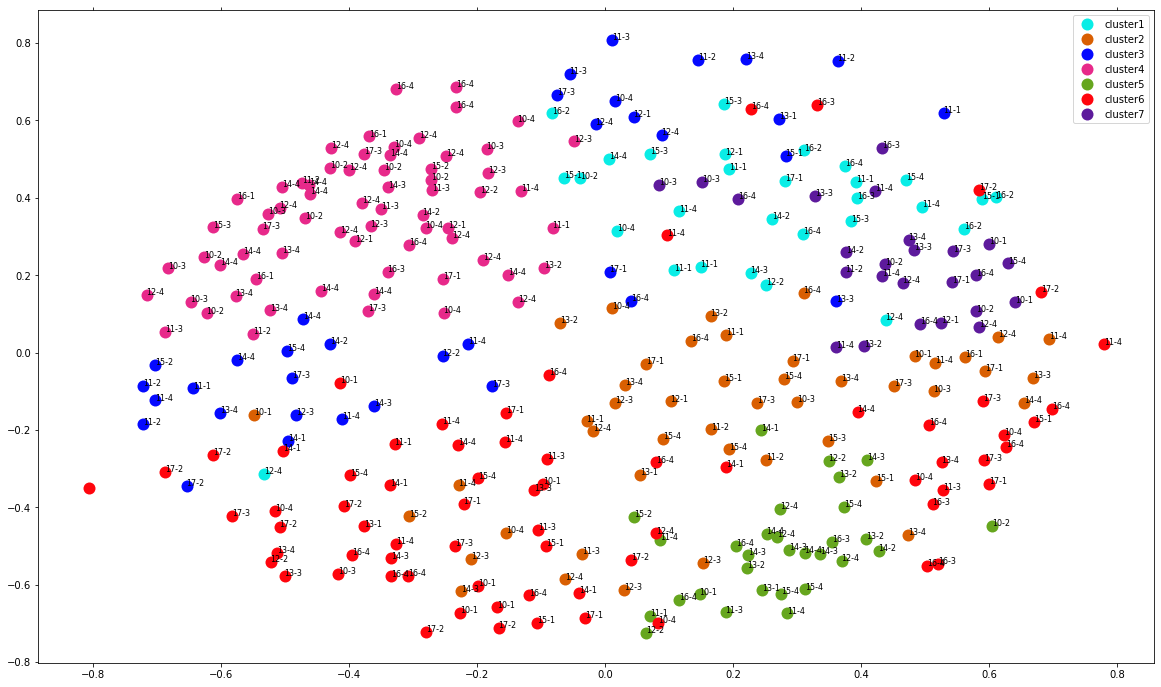

In [37]:
#group by cluster
groups = df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(20, 12)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.loc[i]['x'], df.loc[i]['y'], df.loc[i]['vol'], size=8)  

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
# plt.savefig('gni_clusters_small_noaxes.png', dpi=200)

In [38]:
plt.close()

In [39]:
#define custom toolbar location
class TopToolbar(mpld3.plugins.PluginBase):
    """Plugin for moving toolbar to top of figure"""

    JAVASCRIPT = """
    mpld3.register_plugin("toptoolbar", TopToolbar);
    TopToolbar.prototype = Object.create(mpld3.Plugin.prototype);
    TopToolbar.prototype.constructor = TopToolbar;
    function TopToolbar(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    TopToolbar.prototype.draw = function(){
      // the toolbar svg doesn't exist
      // yet, so first draw it
      this.fig.toolbar.draw();

      // then change the y position to be
      // at the top of the figure
      this.fig.toolbar.toolbar.attr("x", 150);
      this.fig.toolbar.toolbar.attr("y", 400);

      // then remove the draw function,
      // so that it is not called again
      this.fig.toolbar.draw = function() {}
    }
    """
    def __init__(self):
        self.dict_ = {"type": "toptoolbar"}

### First (302개 논문)

In [40]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=titles)) 

#group by cluster
groups = df.groupby('label')

#define custom css to format the font and to remove the axis labeling
css = """
text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }
"""

# Plot 
fig, ax = plt.subplots(figsize=(14,6)) #set plot size
ax.margins(0.03) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    points = ax.plot(group.x, group.y, marker='o', linestyle='', ms=18, label=cluster_names[name], mec='none', color=cluster_colors[name])
    ax.set_aspect('auto')
    labels = [i for i in group.title]
    
    #set tooltip using points, labels and the already defined 'css'
    tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                       voffset=10, hoffset=10, css=css)
    #connect tooltip to fig
    mpld3.plugins.connect(fig, tooltip, TopToolbar())    
    
    #set tick marks as blank
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    
    #set axis as blank
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    
ax.legend(numpoints=1) #show legend with only one dot

mpld3.display() #show the plot

#uncomment the below to export to html
#html = mpld3.fig_to_html(fig)
#print(html)

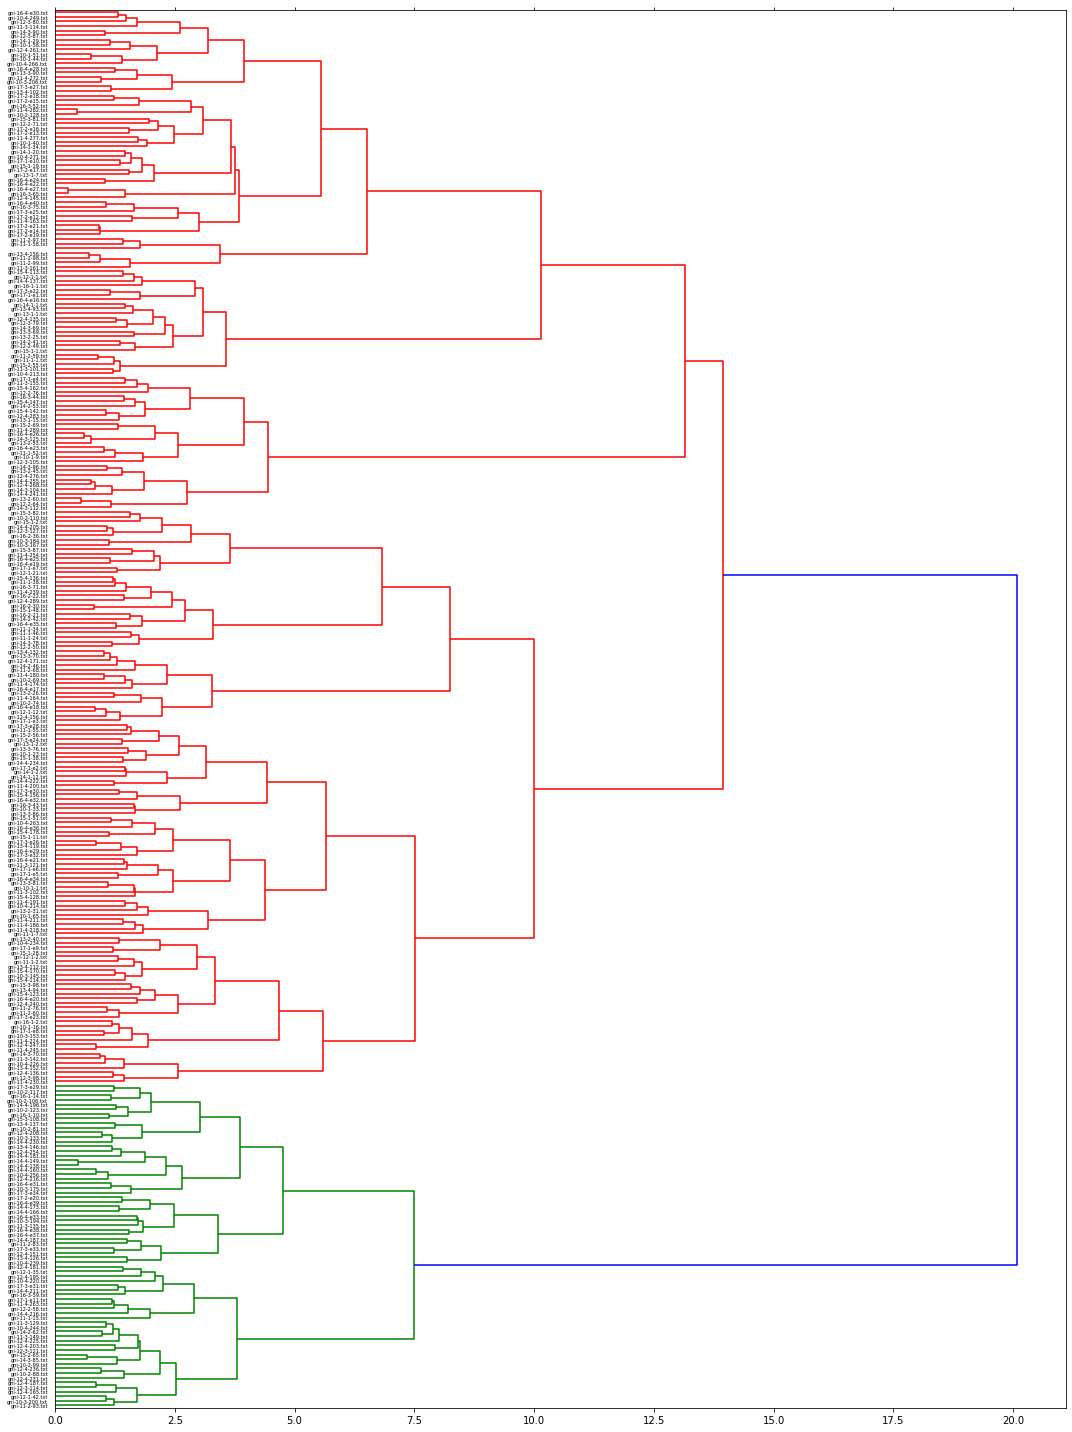

In [41]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=titles);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('gni_clusters.png', dpi=200) #save figure as ward_clusters

In [42]:
plt.close()

# POS Tag

In [80]:
from nltk.corpus import brown

brown_sent_tag = brown.tagged_sents(tagset = 'universal')
nltk_sent_tag = nltk.pos_tag(totalvocab_stemmed, tagset = 'universal')

In [81]:
brown_sent = brown.sents()
sent_tag = []
sent_tag.append(nltk_sent_tag)

#brown corpus 기반
brownCorpus = nltk.corpus.brown.sents()
brownSents = brownCorpus

In [46]:
# training 할 brownCorpus의 size
brownSize = int(len(brown_sent_tag)*0.9)
print(brownSize)

#training 할 brown 전체 corpus
train_sent = brown_sent_tag[:brownSize]

test_sent= sent_tag
test_sent

51606


[[('Title', 'NOUN'),
  ('Survey', 'NOUN'),
  ('of', 'ADP'),
  ('the', 'DET'),
  ('Applications', 'NOUN'),
  ('of', 'ADP'),
  ('NGS', 'NOUN'),
  ('to', 'PRT'),
  ('Whole-Genome', 'NOUN'),
  ('Sequencing', 'NOUN'),
  ('and', 'CONJ'),
  ('Expression', 'NOUN'),
  ('Profiling', 'NOUN'),
  ('Recently', 'ADV'),
  ('the', 'DET'),
  ('technology', 'NOUN'),
  ('of', 'ADP'),
  ('DNA', 'NOUN'),
  ('sequence', 'NOUN'),
  ('variation', 'NOUN'),
  ('and', 'CONJ'),
  ('gene', 'NOUN'),
  ('expression', 'NOUN'),
  ('profiling', 'VERB'),
  ('have', 'VERB'),
  ('been', 'VERB'),
  ('used', 'VERB'),
  ('widely', 'ADV'),
  ('a', 'DET'),
  ('approach', 'NOUN'),
  ('in', 'ADP'),
  ('the', 'DET'),
  ('expertise', 'NOUN'),
  ('of', 'ADP'),
  ('genome', 'ADJ'),
  ('biology', 'NOUN'),
  ('and', 'CONJ'),
  ('genetics', 'NOUN'),
  ('The', 'DET'),
  ('application', 'NOUN'),
  ('to', 'PRT'),
  ('genome', 'VERB'),
  ('study', 'NOUN'),
  ('ha', 'ADV'),
  ('been', 'VERB'),
  ('particularly', 'ADV'),
  ('developed', 'VERB

In [47]:
train_sent

[[('The', 'DET'), ('Fulton', 'NOUN'), ('County', 'NOUN'), ('Grand', 'ADJ'), ('Jury', 'NOUN'), ('said', 'VERB'), ('Friday', 'NOUN'), ('an', 'DET'), ('investigation', 'NOUN'), ('of', 'ADP'), ("Atlanta's", 'NOUN'), ('recent', 'ADJ'), ('primary', 'NOUN'), ('election', 'NOUN'), ('produced', 'VERB'), ('``', '.'), ('no', 'DET'), ('evidence', 'NOUN'), ("''", '.'), ('that', 'ADP'), ('any', 'DET'), ('irregularities', 'NOUN'), ('took', 'VERB'), ('place', 'NOUN'), ('.', '.')], [('The', 'DET'), ('jury', 'NOUN'), ('further', 'ADV'), ('said', 'VERB'), ('in', 'ADP'), ('term-end', 'NOUN'), ('presentments', 'NOUN'), ('that', 'ADP'), ('the', 'DET'), ('City', 'NOUN'), ('Executive', 'ADJ'), ('Committee', 'NOUN'), (',', '.'), ('which', 'DET'), ('had', 'VERB'), ('over-all', 'ADJ'), ('charge', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('election', 'NOUN'), (',', '.'), ('``', '.'), ('deserves', 'VERB'), ('the', 'DET'), ('praise', 'NOUN'), ('and', 'CONJ'), ('thanks', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('City

In [97]:
t0 = nltk.DefaultTagger('NOUN')
t1 = nltk.UnigramTagger(train_sent, backoff = t0)
t2 = nltk.BigramTagger(train_sent, backoff = t1)

In [98]:
result = t2.tag(totalvocab_stemmed)
pos_result1 = list()
for i in range(len(result)):
    pos_result1.append(result)

In [99]:
print('Accuracy : ',t2.evaluate(test_sent))

Accuracy :  0.8815153099932971


  NOUN   VERB    ADP    DET    ADJ   CONJ    ADV    PRT   PRON    NUM      X 
290764  94924  90464  70395  53006  25713  21193  15667  10515   3994   2170 


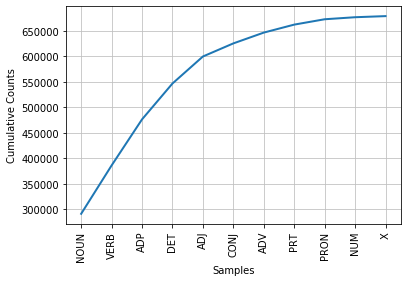

In [100]:
#빈번한 횟수
before_tag_fd = nltk.FreqDist(tag for (word,tag) in result)
before_tag_fd.tabulate()
before_tag_fd.plot(cumulative=True)

# WordCloud

In [52]:
#strip any proper names from a text...unfortunately right now this is yanking the first word from a sentence too.
import string
def strip_proppers(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word.islower()]
    return "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in tokens]).strip()

In [53]:
#strip any proper nouns (NNP) or plural proper nouns (NNPS) from a text
from nltk.tag import pos_tag

def strip_proppers_POS(text):
    tagged = pos_tag(text.split()) #use NLTK's part of speech tagger
    non_propernouns = [word for word,pos in tagged if pos != 'NNP' and pos != 'NNPS']
    return non_propernouns

In [54]:
#Latent Dirichlet Allocation implementation with Gensim

from gensim import corpora, models, similarities 

#remove proper names
preprocess = [strip_proppers(doc) for doc in gni_text]

%time tokenized_text = [tokenize_and_stem(text) for text in preprocess]

%time texts = [[word for word in text if word not in stopwords] for text in tokenized_text]

CPU times: user 6.07 s, sys: 117 ms, total: 6.18 s
Wall time: 6.96 s
CPU times: user 934 ms, sys: 17.7 ms, total: 952 ms
Wall time: 1.01 s


In [55]:
#print(len([word for word in texts[0] if word not in stopwords]))
print(len(texts[0]))

1588


In [56]:
dictionary = corpora.Dictionary(texts)

In [57]:
dictionary.filter_extremes(no_below=1, no_above=0.8)

In [58]:
corpus = [dictionary.doc2bow(text) for text in texts]

In [59]:
len(corpus)

302

In [60]:
%time lda = models.LdaModel(corpus, num_topics=7, id2word=dictionary, update_every=5, chunksize=10000, passes=100)

CPU times: user 4min 22s, sys: 3.75 s, total: 4min 26s
Wall time: 2min 44s


In [61]:
print(lda[corpus[0]])

[(0, 0.023814349), (1, 0.24472076), (2, 0.031226646), (4, 0.671985), (5, 0.02805748)]


In [62]:
topics = lda.print_topics(7, num_words=20)

In [63]:
topics_matrix = lda.show_topics(formatted=False, num_words=20)

In [64]:
topics_matrix = np.array(topics_matrix)

In [65]:
topics_matrix.shape

(7, 2)

In [66]:
lda.show_topics()

[(0,
  '0.015*"genetic" + 0.014*"population" + 0.012*"association" + 0.008*"associated" + 0.008*"risk" + 0.007*"disease" + 0.007*"genotype" + 0.007*"allele" + 0.007*"group" + 0.007*"sample"'),
 (1,
  '0.019*"genome" + 0.017*"sequence" + 0.011*"element" + 0.011*"human" + 0.009*"variable" + 0.007*"method" + 0.007*"specie" + 0.007*"two" + 0.006*"chromosome" + 0.006*"intron"'),
 (2,
  '0.022*"cell" + 0.018*"cancer" + 0.014*"expression" + 0.013*"mutation" + 0.008*"tumor" + 0.006*"human" + 0.006*"protein" + 0.006*"tissue" + 0.006*"sample" + 0.006*"patient"'),
 (3,
  '0.021*"protein" + 0.016*"structure" + 0.012*"model" + 0.011*"drug" + 0.010*"residue" + 0.010*"binding" + 0.009*"interaction" + 0.009*"acid" + 0.009*"compound" + 0.008*"molecular"'),
 (4,
  '0.010*"sequencing" + 0.009*"information" + 0.007*"method" + 0.007*"database" + 0.007*"read" + 0.006*"sequence" + 0.005*"annotation" + 0.005*"tool" + 0.005*"set" + 0.005*"genome"'),
 (5,
  '0.019*"protein" + 0.012*"sequence" + 0.007*"function"

In [82]:
topics_matrix

array([[0,
        list([('genetic', 0.01468988), ('population', 0.014294219), ('association', 0.011630703), ('associated', 0.008374498), ('risk', 0.0075333375), ('disease', 0.0072885393), ('genotype', 0.00704683), ('allele', 0.0069332914), ('group', 0.006754838), ('sample', 0.0066560474), ('polymorphism', 0.0065140156), ('test', 0.006401766), ('model', 0.0060881414), ('variant', 0.0060378155), ('individual', 0.0059788674), ('effect', 0.0059731347), ('control', 0.0058529237), ('number', 0.0058120205), ('p', 0.0057922616), ('region', 0.0056721587)])],
       [1,
        list([('genome', 0.018801665), ('sequence', 0.017455684), ('element', 0.011044857), ('human', 0.01057497), ('variable', 0.008627397), ('method', 0.007446713), ('specie', 0.0072526596), ('two', 0.0069922605), ('chromosome', 0.0059418627), ('intron', 0.0057597104), ('pattern', 0.0056683226), ('number', 0.0055964263), ('genomic', 0.00517011), ('block', 0.005114485), ('model', 0.005066964), ('size', 0.0047589643), ('length',

In [68]:
topic_words = topics_matrix[:,1]

In [69]:
total_topic = list()

for i in topic_words:
    tmpStr = []
    for j in i:
        tmpStr.append(str(j[0]))
    print(tmpStr)
    print()
    total_topic.append(tmpStr)

['genetic', 'population', 'association', 'associated', 'risk', 'disease', 'genotype', 'allele', 'group', 'sample', 'polymorphism', 'test', 'model', 'variant', 'individual', 'effect', 'control', 'number', 'p', 'region']

['genome', 'sequence', 'element', 'human', 'variable', 'method', 'specie', 'two', 'chromosome', 'intron', 'pattern', 'number', 'genomic', 'block', 'model', 'size', 'length', 'plant', 'different', 'one']

['cell', 'cancer', 'expression', 'mutation', 'tumor', 'human', 'protein', 'tissue', 'sample', 'patient', 'level', 'role', 'factor', 'transcription', 'type', 'function', 'codon', 'site', 'mechanism', 'including']

['protein', 'structure', 'model', 'drug', 'residue', 'binding', 'interaction', 'acid', 'compound', 'molecular', 'docking', 'ligand', 'amino', 'energy', 'predicted', 'target', 'score', 'found', 'region', 'natural']

['sequencing', 'information', 'method', 'database', 'read', 'sequence', 'annotation', 'tool', 'set', 'genome', 'number', 'disease', 'approach', 'var

In [70]:
from wordcloud import WordCloud

In [71]:
wordcloud1 = WordCloud(background_color='white').generate(str(topics_matrix[0][1]))
wordcloud2 = WordCloud(background_color='white').generate(str(topics_matrix[1][1]))
wordcloud3 = WordCloud(background_color='white').generate(str(topics_matrix[2][1]))
wordcloud4 = WordCloud(background_color='white').generate(str(topics_matrix[3][1]))
wordcloud5 = WordCloud(background_color='white').generate(str(topics_matrix[4][1]))
wordcloud6 = WordCloud(background_color='white').generate(str(topics_matrix[5][1]))
wordcloud7 = WordCloud(background_color='white').generate(str(topics_matrix[6][1]))

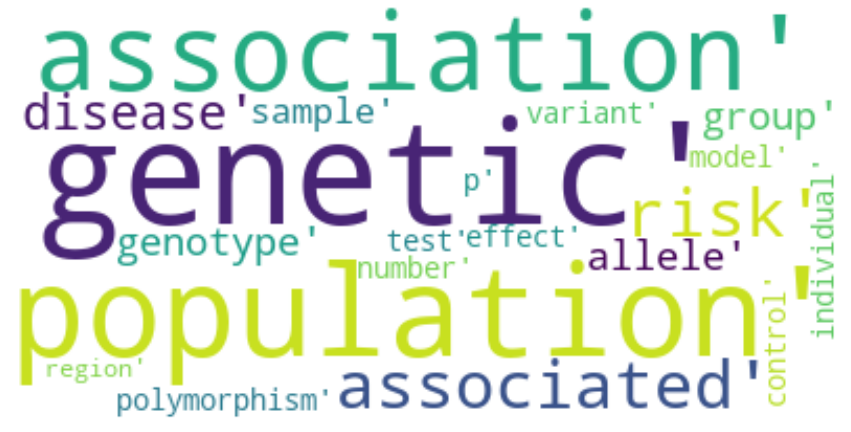

In [83]:
# cluster 1
plt.figure(figsize=(15,15))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

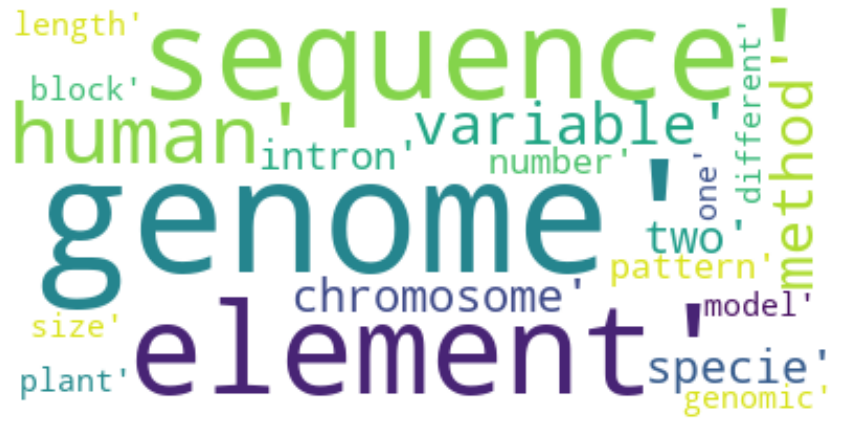

In [84]:
# cluster 2
plt.figure(figsize=(15,15))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

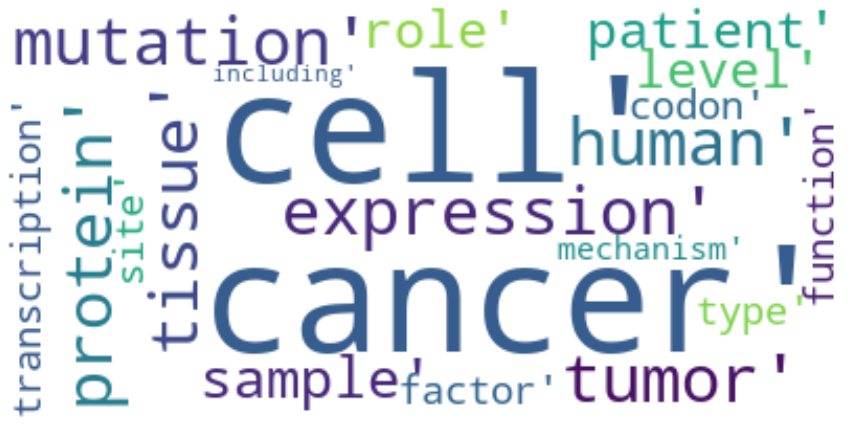

In [85]:
# cluster 3
plt.figure(figsize=(15,15))
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.show()

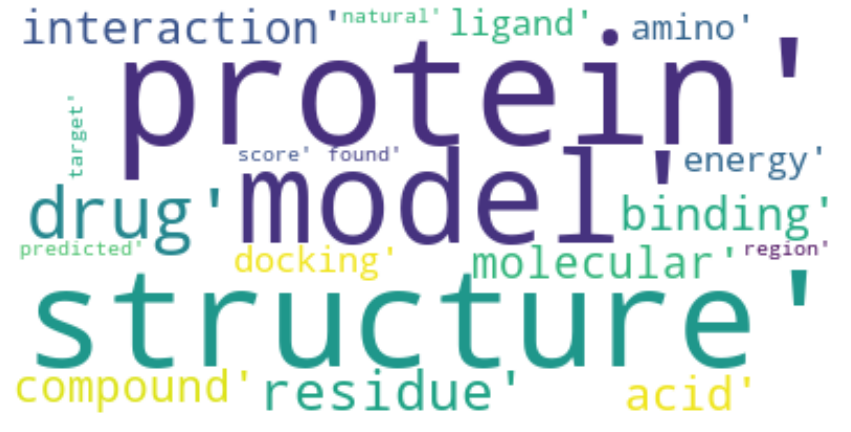

In [86]:
# cluster 4
plt.figure(figsize=(15,15))
plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis("off")
plt.show()

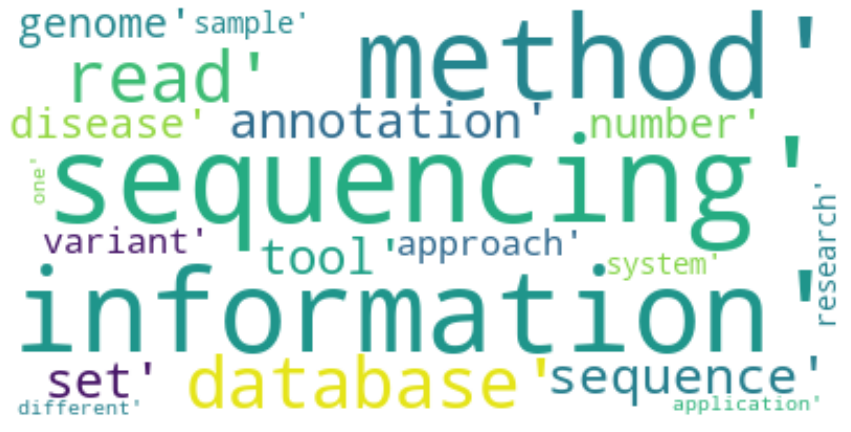

In [87]:
# cluster 5
plt.figure(figsize=(15,15))
plt.imshow(wordcloud5, interpolation='bilinear')
plt.axis("off")
plt.show()

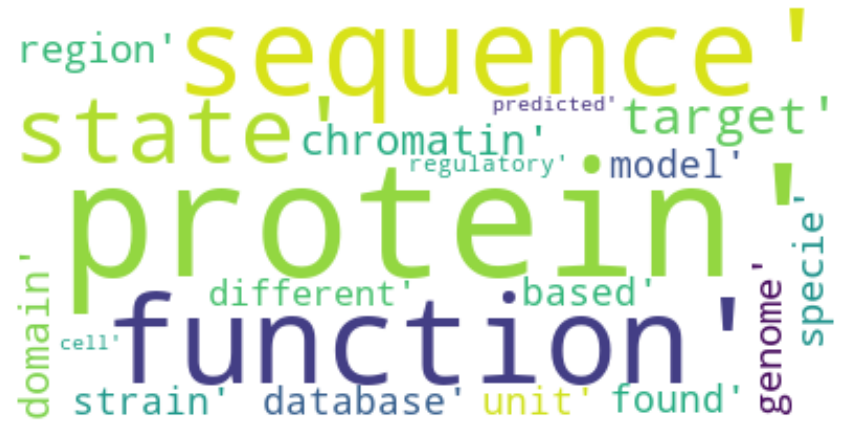

In [88]:
# cluster 6
plt.figure(figsize=(15,15))
plt.imshow(wordcloud6, interpolation='bilinear')
plt.axis("off")
plt.show()

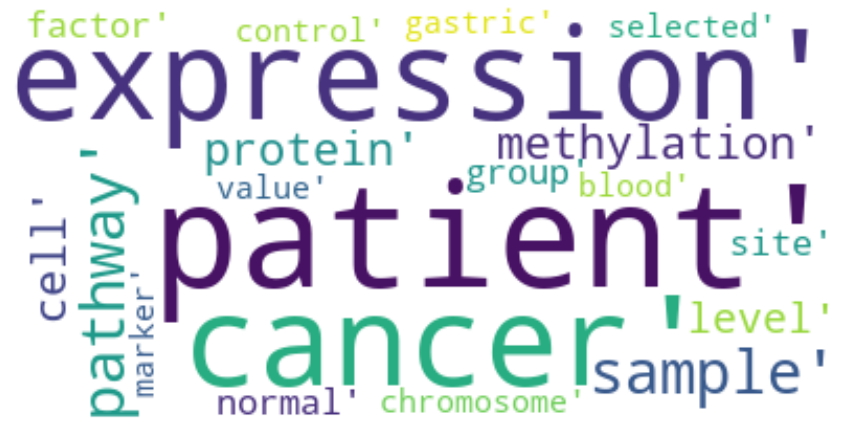

In [89]:
# cluster 7
plt.figure(figsize=(15,15))
plt.imshow(wordcloud7, interpolation='bilinear')
plt.axis("off")
plt.show()